In [38]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
import seaborn as sns

In [16]:
df = pd.read_csv('data/ThoraricSurgery.csv')

In [28]:
#Data 임시로 확인 - 대략적인 관계도 확인
df.describe()

,293,1,3.8,2.8,0,0.1,0.2,0.3,0.4,0.5,12,0.6,0.7,0.8,1.1,0.9,62,0.10
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000
mean,235.377399,3.100213,3.280533,4.572473,0.782516,0.066098,0.144989,0.066098,0.688699,0.166311,11.735608,0.074627,0.004264,0.017058,0.820896,0.004264,62.535181,0.149254
std,135.940568,0.716547,0.871996,11.780139,0.534727,0.248719,0.352466,0.248719,0.463520,0.372757,0.702887,0.263069,0.065233,0.129624,0.383849,0.065233,8.716164,0.356719
min,1.000000,2.000000,1.440000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,118.000000,3.000000,2.600000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,235.000000,3.000000,3.160000,2.400000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,353.000000,3.000000,3.810000,3.080000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,470.000000,8.000000,6.300000,86.300000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [26]:
#NAN 등의 결함 데이터를 찾기 위한 첫번째 파악
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469 entries, 0 to 468
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   293     469 non-null    int64  
 1   1       469 non-null    int64  
 2   3.8     469 non-null    float64
 3   2.8     469 non-null    float64
 4   0       469 non-null    int64  
 5   0.1     469 non-null    int64  
 6   0.2     469 non-null    int64  
 7   0.3     469 non-null    int64  
 8   0.4     469 non-null    int64  
 9   0.5     469 non-null    int64  
 10  12      469 non-null    int64  
 11  0.6     469 non-null    int64  
 12  0.7     469 non-null    int64  
 13  0.8     469 non-null    int64  
 14  1.1     469 non-null    int64  
 15  0.9     469 non-null    int64  
 16  62      469 non-null    int64  
 17  0.10    469 non-null    int64  
dtypes: float64(2), int64(16)
memory usage: 69.6 KB


In [31]:
X = df.drop(['0.10'],axis = 1)
Y = df[['0.10']]

In [32]:
X.corr()

,293,1,3.8,2.8,0,0.1,0.2,0.3,0.4,0.5,12,0.6,0.7,0.8,1.1,0.9,62
293,1.000000,-0.005303,-0.035544,0.029706,-0.020180,0.052978,0.027619,-0.061661,0.010211,0.027686,0.046755,-0.008975,-0.016326,-0.015645,-0.039119,-0.042349,-0.005772
1,-0.005303,1.000000,0.126137,0.058377,-0.065684,0.046680,-0.066114,-0.049236,-0.086007,-0.022533,-0.133951,0.028254,-0.009162,-0.018443,-0.105515,-0.009162,0.076583
3.8,-0.035544,0.126137,1.000000,0.033180,-0.089477,0.020133,-0.095358,0.056192,-0.051027,-0.099734,0.033628,-0.114838,-0.009055,-0.035431,-0.012609,-0.060519,-0.290211
2.8,0.029706,0.058377,0.033180,1.000000,-0.143954,0.161546,0.102868,0.260013,-0.100628,-0.086267,0.015627,-0.022344,-0.013639,-0.025132,-0.100729,-0.016531,-0.115923
0,-0.020180,-0.065684,-0.089477,-0.143954,1.000000,0.092252,0.122316,0.092252,0.683185,0.417692,0.091143,0.024485,0.026645,0.022808,0.174178,-0.034612,0.214827
0.1,0.052978,0.046680,0.020133,0.161546,0.092252,1.000000,0.256058,0.067388,-0.025015,-0.072729,0.100178,0.022421,-0.017410,-0.035046,-0.077165,-0.017410,0.044757
0.2,0.027619,-0.066114,-0.095358,0.102868,0.122316,0.256058,1.000000,0.134187,0.080676,0.060025,0.060190,-0.001720,-0.026949,0.086057,-0.044552,-0.026949,0.086667
0.3,-0.061661,-0.049236,0.056192,0.260013,0.092252,0.067388,0.134187,1.000000,0.049122,-0.072729,0.075733,-0.042893,-0.017410,0.097507,-0.077165,-0.017410,-0.015367
0.4,0.010211,-0.086007,-0.051027,-0.100628,0.683185,-0.025015,0.080676,0.049122,1.000000,0.201350,0.146901,0.015693,0.043998,0.017440,0.202369,-0.026670,0.149746
0.5,0.027686,-0.022533,-0.099734,-0.086267,0.417692,-0.072729,0.060025,-0.072729,0.201350,1.000000,-0.035699,0.069273,0.058646,0.029607,0.119024,-0.029229,0.207989


<function matplotlib.pyplot.show(close=None, block=None)>

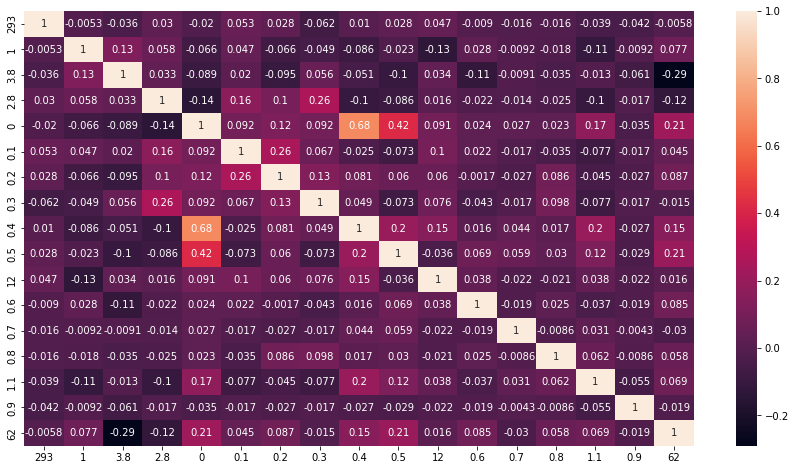

In [37]:
plt.figure(figsize=(15,8))
sns.heatmap(X.corr(),annot=True)
plt.show

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [47]:
np.random.seed(3)
tf.random.set_seed(3)

model = Sequential()
model.add(Dense(30,input_dim=17,activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss='mean_squared_error',metrics=['accuracy'],optimizer='adam')

In [49]:
scores = model.fit(X,Y,epochs=100)

Epoch 1/100
15/15 [==============================] - 0s 929us/step - loss: 0.1197 - accuracy: 0.8593
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1167 - accuracy: 0.8550
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1175 - accuracy: 0.8593
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1219 - accuracy: 0.8550
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1181 - accuracy: 0.8571
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1179 - accuracy: 0.8550
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1217 - accuracy: 0.8529
Epoch 8/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1202 - accuracy: 0.8571
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1183 - accuracy: 0.8529
Epoch 10/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1206 - accuracy: 0.8529
Epoch 1

15/15 [==============================] - 0s 997us/step - loss: 0.1157 - accuracy: 0.8614
Epoch 83/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1120 - accuracy: 0.8614
Epoch 84/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1169 - accuracy: 0.8593
Epoch 85/100
15/15 [==============================] - 0s 997us/step - loss: 0.1157 - accuracy: 0.8571
Epoch 86/100
15/15 [==============================] - 0s 921us/step - loss: 0.1155 - accuracy: 0.8593
Epoch 87/100
15/15 [==============================] - 0s 997us/step - loss: 0.1184 - accuracy: 0.8593
Epoch 88/100
15/15 [==============================] - 0s 997us/step - loss: 0.1154 - accuracy: 0.8529
Epoch 89/100
15/15 [==============================] - 0s 926us/step - loss: 0.1136 - accuracy: 0.8571
Epoch 90/100
15/15 [==============================] - 0s 926us/step - loss: 0.1128 - accuracy: 0.8614
Epoch 91/100
15/15 [==============================] - 0s 926us/step - loss: 0.1214 - accuracy: 0.85

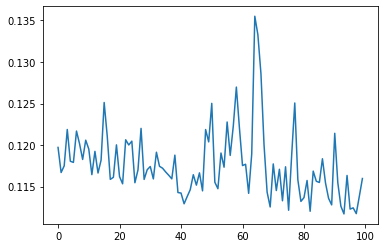

In [56]:
y_loss = scores.history['loss']
y_acc = scores.history['accuracy']

plt.plot(y_loss)

In [82]:
test_x = [X.iloc[2]]

In [85]:
test_x[0]

293    14.00
1       2.00
3.8     3.98
2.8     3.06
0       2.00
0.1     0.00
0.2     0.00
0.3     0.00
0.4     1.00
0.5     1.00
12     14.00
0.6     0.00
0.7     0.00
0.8     0.00
1.1     1.00
0.9     0.00
62     80.00
Name: 2, dtype: float64

In [68]:
model.predict(test_x)

ValueError: in user code:

    C:\Users\neote\anaconda3\envs\tech\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    C:\Users\neote\anaconda3\envs\tech\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\neote\anaconda3\envs\tech\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\neote\anaconda3\envs\tech\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\neote\anaconda3\envs\tech\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\neote\anaconda3\envs\tech\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    C:\Users\neote\anaconda3\envs\tech\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    C:\Users\neote\anaconda3\envs\tech\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\neote\anaconda3\envs\tech\lib\site-packages\keras\engine\input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis -1 of input shape to have value 17 but received input with shape (None, 1)


In [65]:
test_x

[[293     8.00
  1       2.00
  3.8     3.19
  2.8     2.50
  0       1.00
  0.1     0.00
  0.2     0.00
  0.3     0.00
  0.4     1.00
  0.5     0.00
  12     11.00
  0.6     0.00
  0.7     0.00
  0.8     1.00
  1.1     1.00
  0.9     0.00
  62     66.00
  Name: 1, dtype: float64]]